In [1]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

magic number:2051, number of pics: 60000张, pic size: 28*28
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2049, number of pic: 60000
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2051, number of pics: 10000张, pic size: 28*28
10000decoded
magic number:2049, number of pic: 10000
10000decoded
5.0


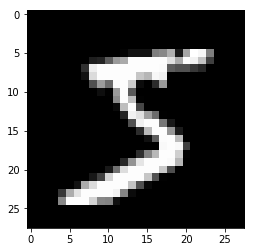

0.0


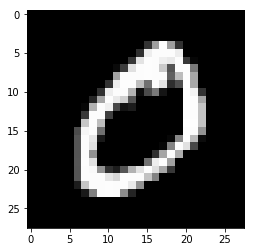

4.0


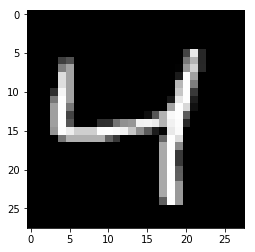

1.0


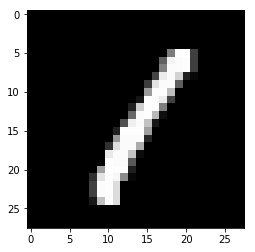

9.0


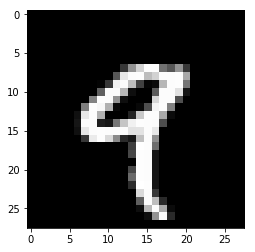

2.0


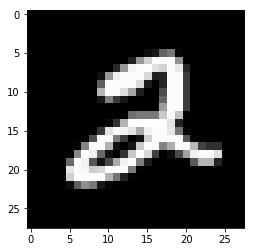

1.0


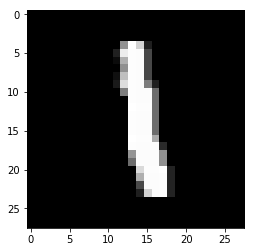

3.0


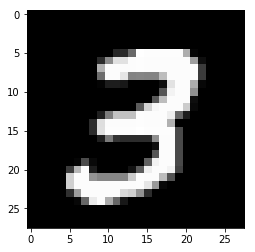

1.0


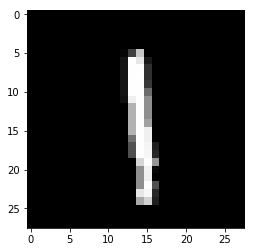

4.0


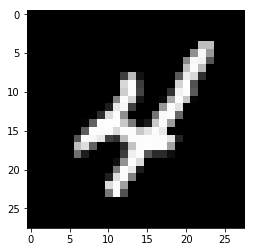

done


In [2]:
# encoding: utf-8
# contributor: https://www.jianshu.com/p/84f72791806f
import numpy as np
import struct
import matplotlib.pyplot as plt

# training set
train_images_idx3_ubyte_file = 'train-images.idx3-ubyte'
# training labels
train_labels_idx1_ubyte_file = 'train-labels.idx1-ubyte'

# testing set
test_images_idx3_ubyte_file = 't10k-images.idx3-ubyte'
# testing label
test_labels_idx1_ubyte_file = 't10k-labels.idx1-ubyte'


def decode_idx3_ubyte(idx3_ubyte_file):

    # reading binary file
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # decoding heading information, magic #, # of pic, Pic size, respectively
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print ('magic number:%d, number of pics: %d张, pic size: %d*%d' % (magic_number, num_images, num_rows, num_cols))

    # decoding data set
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print ('%d' % (i + 1) + 'decoded')
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images


def decode_idx1_ubyte(idx1_ubyte_file):
  
    # reading binary file
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # decoding heading information, magic number, labels, respectively
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print ('magic number:%d, number of pic: %d' % (magic_number, num_images))

    # decoding data set
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print ('%d' % (i + 1) + 'decoded')
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):

    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):

    return decode_idx1_ubyte(idx_ubyte_file)


def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):

    return decode_idx3_ubyte(idx_ubyte_file)


def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):

    return decode_idx1_ubyte(idx_ubyte_file)




def run():
    train_images = load_train_images()
    train_labels = load_train_labels()
    test_images = load_test_images()
    test_labels = load_test_labels()

    # check the top 10 labels
    for i in range(10):
        print (train_labels[i])
        plt.imshow(train_images[i], cmap='gray')
        plt.show()
    print ('done')

if __name__ == '__main__':
    run()


In [3]:
# load mnist
X_train = load_train_images(idx_ubyte_file='train-images.idx3-ubyte')
y_train = load_train_labels(idx_ubyte_file='train-labels.idx1-ubyte')
X_test = load_train_images(idx_ubyte_file='t10k-images.idx3-ubyte')
y_test = load_train_labels(idx_ubyte_file='t10k-labels.idx1-ubyte')

magic number:2051, number of pics: 60000张, pic size: 28*28
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2049, number of pic: 60000
10000decoded
20000decoded
30000decoded
40000decoded
50000decoded
60000decoded
magic number:2051, number of pics: 10000张, pic size: 28*28
10000decoded
magic number:2049, number of pic: 10000
10000decoded


(-0.5, 27.5, 27.5, -0.5)

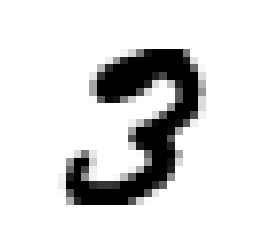

In [4]:
%matplotlib inline

plt.imshow(X_train[12345], cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')

In [5]:
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0

In [6]:
y_train[12345]

3.0

In [7]:
from sklearn.preprocessing import OneHotEncoder
y_train=y_train.reshape(-1,1)
ecd=OneHotEncoder()
y_train=ecd.fit_transform(y_train).toarray()

In [8]:
init= tf.global_variables_initializer()

In [9]:
# leak ReLUS
def leaky_relu(z, name=None):
    return tf.maximum(0.01*z, z, name=name)

In [10]:
# the structure of neural network
n_inputs= 28*28
n_hidden1=300
n_hidden2=150
n_outputs=10

In [11]:
def ANN_Model(X,y):
    h1_layer={'weights':tf.Variable(tf.random_normal([784,n_hidden1])),
             'bias':tf.Variable(tf.random_normal([n_hidden1]))}
    h2_layer={'weights':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
             'bias':tf.Variable(tf.random_normal([n_hidden2]))}
    output_layer={'weights':tf.Variable(tf.random_normal([n_hidden2,n_outputs])),
                 'bias':tf.Variable(tf.random_normal([n_outputs]))}
    # input data*weights + bias
    hidden1= tf.add(tf.matmul(X,h1_layer['weights']),h1_layer['bias'])
    hidden1=leaky_relu(hidden1)

    hidden2= tf.add(tf.matmul(hidden1,h2_layer['weights']),h2_layer['bias'])
    hidden2=leaky_relu(hidden2)

    logits= tf.matmul(hidden2,output_layer['weights'])+output_layer['bias']
    
    return logits

In [12]:
n_epochs = 40
batch_size = 50
learning_rate=0.01

In [13]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]
    
    return np.asarray(data_shuffle).astype(np.float32), np.asarray(labels_shuffle).astype(np.float32)

In [21]:
def train_ANN_Model(X_train,y_train):
    X=tf.placeholder(tf.float32,shape=[None,784],name='X_train')
    y=tf.placeholder(tf.float32, shape=[None,10], name='y_train')
    prediction=ANN_Model(X, y)
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction,labels=y))
    
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
    
        for epoch in range(n_epochs):
            epoch_loss=0
            for _ in range(int(len(X_train)/batch_size)):
                X_batch,y_batch = next_batch(50, X_train, y_train)
                _,c= sess.run([optimizer,cost],feed_dict={X:X_batch,y:y_batch})
                epoch_loss += c
            print('Epoch', epoch, 'completed out of', n_epochs,'loss', epoch_loss)
            
        
        correct = tf.equal(tf.argmax(prediction,1), tf.argmax(y_train,1))
        accuracy = tf.reduce_mean(tf.cast(correct,'float32'))
        print('Accuracy',accuracy.eval({X:X_train,y:y_train}))
    

In [22]:
train_ANN_Model(X_train=X_train, y_train=y_train)

Epoch 0 completed out of 40 loss 22418.54604722187
Epoch 1 completed out of 40 loss 695.7200016578427
Epoch 2 completed out of 40 loss 426.0519584740978
Epoch 3 completed out of 40 loss 363.6623600614257
Epoch 4 completed out of 40 loss 308.49374048563186
Epoch 5 completed out of 40 loss 323.33808396203676
Epoch 6 completed out of 40 loss 354.0929771371848
Epoch 7 completed out of 40 loss 389.3459730637478
Epoch 8 completed out of 40 loss 289.53001215887207
Epoch 9 completed out of 40 loss 281.58256289206753
Epoch 10 completed out of 40 loss 267.2920147660535
Epoch 11 completed out of 40 loss 277.4104044114828
Epoch 12 completed out of 40 loss 253.5913854377267
Epoch 13 completed out of 40 loss 251.66029993835872
Epoch 14 completed out of 40 loss 235.751183172232
Epoch 15 completed out of 40 loss 265.2327488162677
Epoch 16 completed out of 40 loss 233.43204564395768
Epoch 17 completed out of 40 loss 268.48543899086354
Epoch 18 completed out of 40 loss 235.6265829884195
Epoch 19 complet

In [23]:
saver = tf.train.Saver()